In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [9]:
euk = pd.read_csv("eukaryotes.tsv ", sep = "\t", na_values = ["-"])
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5000,38549.0,38554.0,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311.0,48265.0,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847.0,71219.0,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.0470,37603.0,41939.0,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200.0,37660.0,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2000,NaN,NaN,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155.0,298.0,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,NaN,NaN,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,NaN,NaN,2018,Chromosome


In [17]:
euk.dtypes

Species                object
Kingdom                object
Class                  object
Size (Mb)             float64
GC%                   float64
Number of genes       float64
Number of proteins    float64
Publication year        int64
Assembly status        object
dtype: object

In [15]:
euk_float = euk[euk["Size (Mb)"] < 4000].dropna()
euk_float["Number of genes"] = euk_float["Number of genes"].dropna().astype(float)
euk_float["Publication year"] = euk_float["Publication year"].dropna().astype(float)
euk_float.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2365 entries, 0 to 8298
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Species             2365 non-null   object 
 1   Kingdom             2365 non-null   object 
 2   Class               2365 non-null   object 
 3   Size (Mb)           2365 non-null   float64
 4   GC%                 2365 non-null   float64
 5   Number of genes     2365 non-null   float64
 6   Number of proteins  2365 non-null   float64
 7   Publication year    2365 non-null   float64
 8   Assembly status     2365 non-null   object 
dtypes: float64(5), object(4)
memory usage: 184.8+ KB


Text(0.5, 1.0, 'Regression of size vs number of genes for genomes < 4Gb')

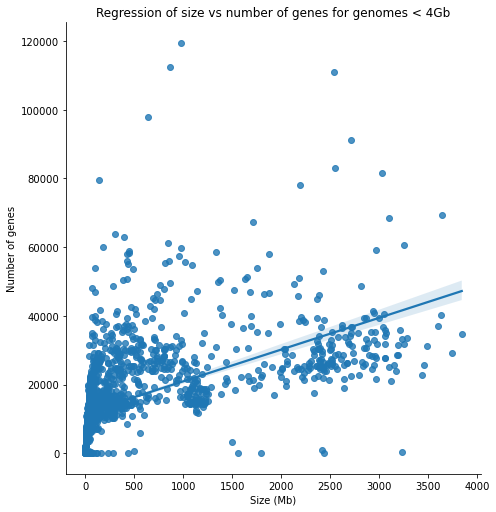

In [23]:
# Linear regression plot

sns.lmplot(data=euk_float, x="Size (Mb)", y="Number of genes", height=7)
plt.title("Regression of size vs number of genes for genomes < 4Gb")

Text(0.5, 1.0, 'First order polynomial regression of size vs number of genes')

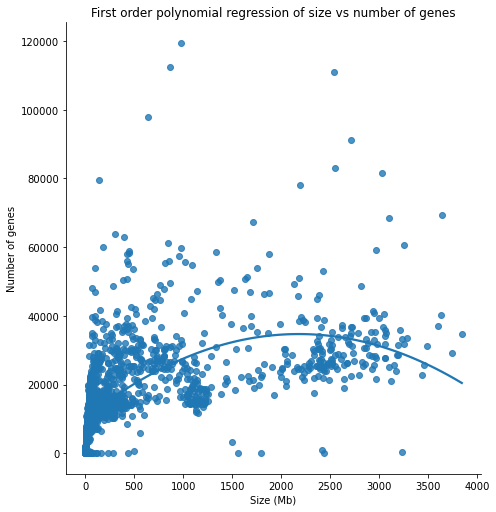

In [27]:
sns.lmplot(data=euk_float, x="Size (Mb)", y="Number of genes", height=7, ci=None, order=2)
plt.title("First order polynomial regression of size vs number of genes")

In [32]:
# Actual results for the regression

import scipy
scipy.stats.linregress(euk_float["Size (Mb)"], euk_float["Number of genes"])

LinregressResult(slope=9.241624440044749, intercept=11703.969342377162, rvalue=0.5834836793744449, pvalue=7.717426152313987e-216, stderr=0.2646126179180758, intercept_stderr=214.83226834087438)

Text(0.5, 1.05, 'Pairwise relationships in the eukaryote genome dataset')

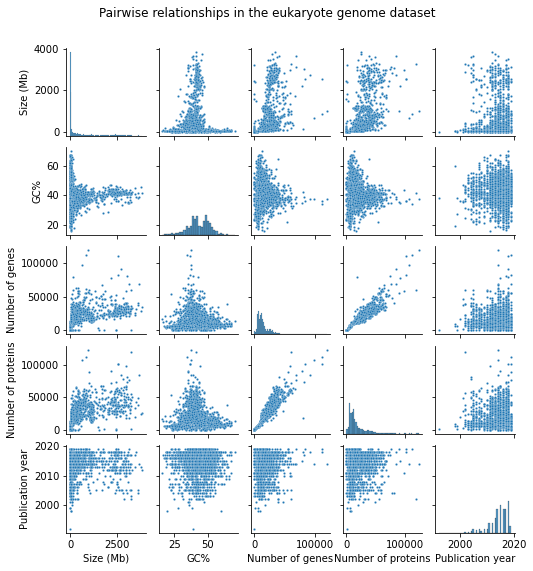

In [38]:
# Plotting psirwise relatiomships

g = sns.pairplot(
    data=euk_float,
    plot_kws={"s": 5},   # draw small points
    height=1.5           # make the individual plots small
)
g.fig.suptitle("Pairwise relationships in the eukaryote genome dataset", y=1.05)

Text(0.5, 1.05, 'Pairwise regression in the eukaryote genome dataset')

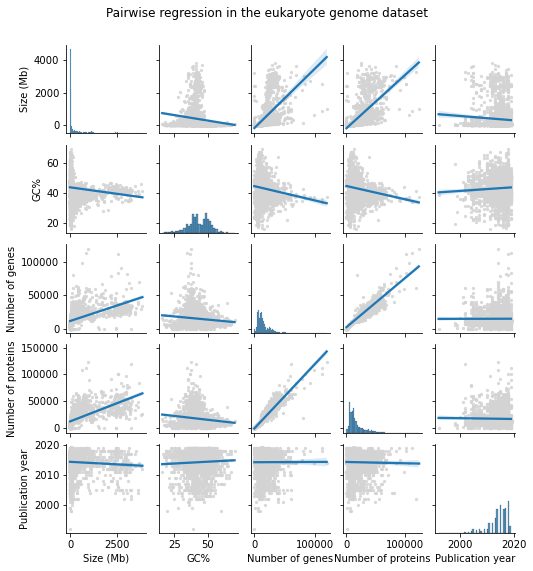

In [39]:
# Drawing a regression line

g = sns.pairplot(
    data=euk_float,
    kind="reg",
    plot_kws={"scatter_kws": {"color": "lightgrey", "s": 5}},
    height=1.5
)
g.fig.suptitle("Pairwise regression in the eukaryote genome dataset", y=1.05)

Text(0.5, 1.05, 'Pairwise polynomial regression in the eukaryote genome dataset')

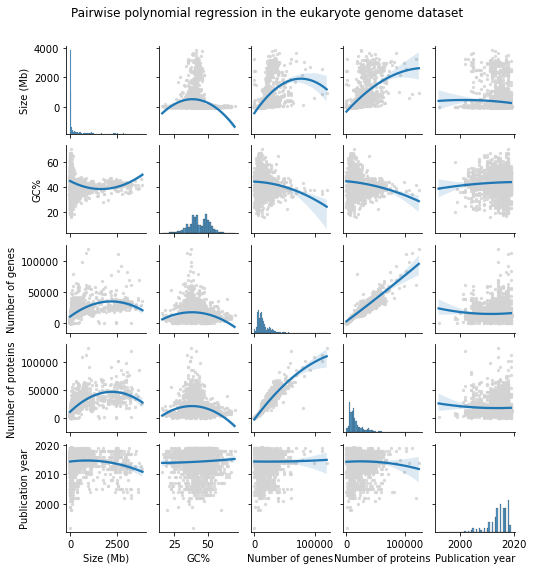

In [40]:
# Polynomial regression

g = sns.pairplot(
    data=euk_float,
    kind="reg",
    plot_kws={"scatter_kws": {"color": "lightgrey", "s": 5}, "order": 2},
    height=1.5
)
g.fig.suptitle("Pairwise polynomial regression in the eukaryote genome dataset", y=1.05)